In [21]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np
from statistics import mean
from scipy.spatial import distance
import math

In [22]:
iris = datasets.load_iris()
x0 = iris.data

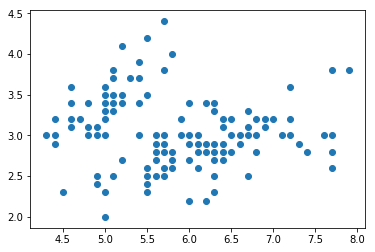

In [23]:
x=np.array([x0[:,0],x0[:,1]]).T
x=np.unique(x,axis=0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [24]:
def cluster_center(k):
    np.random.shuffle(x)
    return x[:k]

In [25]:
def distance_calculate(x,cc):
    dst = np.linalg.norm(x-cc)
    return dst

In [26]:
def find_maximum(m):
    maxi=m[0][1]
    max_index=m[0][0]
    for i in range(len(m)-1):
        if(maxi<m[i+1][1]):
            maxi=m[i+1][1]
            max_index=m[i+1][0]
    return(max_index)    
        

In [27]:
def initial_seed(k):
    x0=x.copy()
    idx=np.random.randint(x0.shape[0],size=1)
    cc=x0[idx,:]
    c=cc.tolist()
    x0=np.delete(x0,idx,axis=0)
    for i in range(1,k):
        m=[]
        for j in range(len(c)):
            dst=[]
            for k in range(len(x0)):
                dst.append(np.linalg.norm(x0[k]-c[j]))    
            m.append([dst.index(max(dst)),max(dst)])
        max_index=find_maximum(m)    
        c.append(x0[max_index,:])
        x0=np.delete(x0,max_index,axis=0)
    return c    

In [1]:
def plot(cluster,c):
    color=['b','g','r','c','m','y','w']
    fig=plt.figure()
    ax = fig.add_subplot(1,1,1)  
    for key in cluster.keys():
        b=np.array(cluster[key])
        ax.scatter(b[:,0],b[:,1],color=color[key],s=30)
    ax.scatter(c[:,0], c[:,1], marker='*', c='y', s=150)    

In [2]:
def kmeans(max_iter,k):    
    cc=np.array(initial_seed(k))
    for i in range(max_iter):
        cluster={}
        for r in range(0,k):
            cluster[r]=[]    
        for t in range(0,len(x)):
            min_dist=[]
            for j in range(0,k):
                dis=distance_calculate(x[t,:],cc[j,:])
                min_dist.append(dis)
            m=min_dist.index(min(min_dist))
            cluster[m].append(list(x[t,:]))
        for l in range(0,k):
            b=np.array(cluster[l])
            cc[l]=np.average(b, axis=0)        
    plot(cluster,cc)
    

In [3]:
cluster=kmeans(500,5)

NameError: name 'np' is not defined